In [1]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv(r"C:\Users\Fredrick.Alli\OneDrive - Badger Medical\TTCC.csv")

In [3]:
#To print the first 5 rows
data.head()

,Date,Total Cases
0,01/01/2022,411
1,02/01/2022,408
2,03/01/2022,435
3,04/01/2022,200
4,05/01/2022,242


In [4]:
#To print the last 5 rows
data.tail()

,Date,Total Cases
752,24/01/2024,300
753,25/01/2024,325
754,26/01/2024,241
755,27/01/2024,694
756,28/01/2024,481


In [5]:
#To see the data types 
data.dtypes

Date           object
Total Cases     int64
dtype: object

In [6]:
#To change the Date from object to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

Creating Time Series Model using Prophet Model

In [7]:
from prophet import Prophet

m = Prophet(interval_width=0.95)

#Now turn the columns to represent "ds" and "y"
data.columns = ["ds", "y"]

#Now training the model 
training_run = m.fit(data)

09:28:45 - cmdstanpy - INFO - Chain [1] start processing
09:28:46 - cmdstanpy - INFO - Chain [1] done processing


Evaluate the Model

In [8]:
#This code is used for predicting for the future, periods is how long we will be predicting for 

future = m.make_future_dataframe(periods=23, freq='D')

In [9]:
#To see what the data contains
future.head()

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [10]:
#To see the last 5 dates we are predicting for 
future.tail()

,ds
775,2024-02-16
776,2024-02-17
777,2024-02-18
778,2024-02-19
779,2024-02-20


In [11]:
#Now to use the model to predict for the future
forecast =m.predict(future)

In [12]:
#To see the predicted values from 01/02/24 to 20/01/24
#What is the predicted values
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
770,2024-02-11,368.147083,319.310562,665.690111,367.809924,368.634587,123.764550,123.764550,123.764550,108.170720,108.170720,108.170720,15.593830,15.593830,15.593830,0.0,0.0,0.0,491.911633
771,2024-02-12,368.381435,162.772676,483.160677,367.987938,368.926773,-42.053805,-42.053805,-42.053805,-55.779248,-55.779248,-55.779248,13.725443,13.725443,13.725443,0.0,0.0,0.0,326.327630
772,2024-02-13,368.615788,125.748469,467.712574,368.175126,369.205303,-78.172867,-78.172867,-78.172867,-89.804599,-89.804599,-89.804599,11.631732,11.631732,11.631732,0.0,0.0,0.0,290.442921
773,2024-02-14,368.850140,165.657851,500.453708,368.357730,369.483638,-36.579355,-36.579355,-36.579355,-45.969118,-45.969118,-45.969118,9.389763,9.389763,9.389763,0.0,0.0,0.0,332.270786
774,2024-02-15,369.084493,174.566033,502.344640,368.536829,369.771988,-36.629507,-36.629507,-36.629507,-43.706107,-43.706107,-43.706107,7.076600,7.076600,7.076600,0.0,0.0,0.0,332.454986
775,2024-02-16,369.318845,151.682213,464.794770,368.720780,370.065567,-61.959588,-61.959588,-61.959588,-66.726819,-66.726819,-66.726819,4.767232,4.767232,4.767232,0.0,0.0,0.0,307.359257
776,2024-02-17,369.553197,391.205144,744.919073,368.905671,370.354016,196.347844,196.347844,196.347844,193.815170,193.815170,193.815170,2.532674,2.532674,2.532674,0.0,0.0,0.0,565.901041
777,2024-02-18,369.787550,309.502019,645.228215,369.101611,370.639666,108.608999,108.608999,108.608999,108.170720,108.170720,108.170720,0.438279,0.438279,0.438279,0.0,0.0,0.0,478.396549
778,2024-02-19,370.021902,143.590781,477.943133,369.300317,370.924453,-57.236949,-57.236949,-57.236949,-55.779248,-55.779248,-55.779248,-1.457702,-1.457702,-1.457702,0.0,0.0,0.0,312.784953
779,2024-02-20,370.256255,113.544754,449.486288,369.499024,371.222022,-92.909879,-92.909879,-92.909879,-89.804599,-89.804599,-89.804599,-3.105280,-3.105280,-3.105280,0.0,0.0,0.0,277.346376


To compare the results of our model with the true values from prehistorical datasets

In [13]:
#Lets check the last data 
data.tail(11)

,ds,y
746,2024-01-18,286
747,2024-01-19,284
748,2024-01-20,509
749,2024-01-21,408
750,2024-01-22,208
751,2024-01-23,230
752,2024-01-24,300
753,2024-01-25,325
754,2024-01-26,241
755,2024-01-27,694


In [14]:
#Let's check the last data 
data.head(11)

,ds,y
0,2022-01-01,411
1,2022-01-02,408
2,2022-01-03,435
3,2022-01-04,200
4,2022-01-05,242
5,2022-01-06,228
6,2022-01-07,169
7,2022-01-08,389
8,2022-01-09,338
9,2022-01-10,206


In [15]:
#Now lets compare this values with the actual values
forecast.tail(29)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
751,2024-01-23,363.694387,84.419813,403.357293,363.694387,363.694387,-119.553264,-119.553264,-119.553264,-89.804599,-89.804599,-89.804599,-29.748665,-29.748665,-29.748665,0.0,0.0,0.0,244.141124
752,2024-01-24,363.928740,132.035370,453.767201,363.928740,363.928740,-71.722748,-71.722748,-71.722748,-45.969118,-45.969118,-45.969118,-25.753631,-25.753631,-25.753631,0.0,0.0,0.0,292.205991
753,2024-01-25,364.163092,136.855828,460.181203,364.163092,364.163092,-65.079836,-65.079836,-65.079836,-43.706107,-43.706107,-43.706107,-21.373730,-21.373730,-21.373730,0.0,0.0,0.0,299.083256
754,2024-01-26,364.397444,120.126500,443.440835,364.397444,364.397444,-83.472592,-83.472592,-83.472592,-66.726819,-66.726819,-66.726819,-16.745773,-16.745773,-16.745773,0.0,0.0,0.0,280.924852
755,2024-01-27,364.631797,382.679603,714.653499,364.631797,364.631797,181.811191,181.811191,181.811191,193.815170,193.815170,193.815170,-12.003979,-12.003979,-12.003979,0.0,0.0,0.0,546.442988
756,2024-01-28,364.866149,301.537752,630.391495,364.866149,364.866149,100.893780,100.893780,100.893780,108.170720,108.170720,108.170720,-7.276940,-7.276940,-7.276940,0.0,0.0,0.0,465.759929
757,2024-01-29,365.100502,144.040667,478.288207,365.100502,365.100502,-58.464089,-58.464089,-58.464089,-55.779248,-55.779248,-55.779248,-2.684842,-2.684842,-2.684842,0.0,0.0,0.0,306.636412
758,2024-01-30,365.334854,101.448848,438.690813,365.334854,365.340624,-88.141595,-88.141595,-88.141595,-89.804599,-89.804599,-89.804599,1.663003,1.663003,1.663003,0.0,0.0,0.0,277.193259
759,2024-01-31,365.569206,167.829482,503.521253,365.567218,365.589061,-40.298861,-40.298861,-40.298861,-45.969118,-45.969118,-45.969118,5.670257,5.670257,5.670257,0.0,0.0,0.0,325.270346
760,2024-02-01,365.803559,166.208319,492.136048,365.786448,365.857946,-34.450853,-34.450853,-34.450853,-43.706107,-43.706107,-43.706107,9.255253,9.255253,9.255253,0.0,0.0,0.0,331.352706


In [16]:
#Now lets compare this values with the actual values
forecast.head(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,278.550064,408.445867,739.695133,278.550064,278.550064,293.460330,293.460330,293.460330,193.815170,193.815170,193.815170,99.645160,99.645160,99.645160,0.0,0.0,0.0,572.010394
1,2022-01-02,278.359385,311.444499,645.727379,278.359385,278.359385,195.917915,195.917915,195.917915,108.170720,108.170720,108.170720,87.747195,87.747195,87.747195,0.0,0.0,0.0,474.277300
2,2022-01-03,278.168706,130.415902,461.807933,278.168706,278.168706,19.729984,19.729984,19.729984,-55.779248,-55.779248,-55.779248,75.509232,75.509232,75.509232,0.0,0.0,0.0,297.898691
3,2022-01-04,277.978028,70.604312,408.662841,277.978028,277.978028,-26.679021,-26.679021,-26.679021,-89.804599,-89.804599,-89.804599,63.125578,63.125578,63.125578,0.0,0.0,0.0,251.299007
4,2022-01-05,277.787349,114.035174,451.543339,277.787349,277.787349,4.821157,4.821157,4.821157,-45.969118,-45.969118,-45.969118,50.790275,50.790275,50.790275,0.0,0.0,0.0,282.608506
5,2022-01-06,277.596670,115.328909,435.556428,277.596670,277.596670,-5.013162,-5.013162,-5.013162,-43.706107,-43.706107,-43.706107,38.692945,38.692945,38.692945,0.0,0.0,0.0,272.583508
6,2022-01-07,277.405991,69.624609,390.843852,277.405991,277.405991,-39.712023,-39.712023,-39.712023,-66.726819,-66.726819,-66.726819,27.014797,27.014797,27.014797,0.0,0.0,0.0,237.693969
7,2022-01-08,277.215312,313.750469,641.048092,277.215312,277.215312,209.740066,209.740066,209.740066,193.815170,193.815170,193.815170,15.924896,15.924896,15.924896,0.0,0.0,0.0,486.955379
8,2022-01-09,277.024633,226.529937,551.459789,277.024633,277.024633,113.747500,113.747500,113.747500,108.170720,108.170720,108.170720,5.576780,5.576780,5.576780,0.0,0.0,0.0,390.772134
9,2022-01-10,276.833955,70.806235,379.818439,276.833955,276.833955,-59.673755,-59.673755,-59.673755,-55.779248,-55.779248,-55.779248,-3.894508,-3.894508,-3.894508,0.0,0.0,0.0,217.160199


Now let's see the forecast from 28-01-24 till 20-02-24

In [17]:
#To print from 28-01-24 to 20-02-24
forecast.iloc[756:781]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
756,2024-01-28,364.866149,301.537752,630.391495,364.866149,364.866149,100.893780,100.893780,100.893780,108.170720,108.170720,108.170720,-7.276940,-7.276940,-7.276940,0.0,0.0,0.0,465.759929
757,2024-01-29,365.100502,144.040667,478.288207,365.100502,365.100502,-58.464089,-58.464089,-58.464089,-55.779248,-55.779248,-55.779248,-2.684842,-2.684842,-2.684842,0.0,0.0,0.0,306.636412
758,2024-01-30,365.334854,101.448848,438.690813,365.334854,365.340624,-88.141595,-88.141595,-88.141595,-89.804599,-89.804599,-89.804599,1.663003,1.663003,1.663003,0.0,0.0,0.0,277.193259
759,2024-01-31,365.569206,167.829482,503.521253,365.567218,365.589061,-40.298861,-40.298861,-40.298861,-45.969118,-45.969118,-45.969118,5.670257,5.670257,5.670257,0.0,0.0,0.0,325.270346
760,2024-02-01,365.803559,166.208319,492.136048,365.786448,365.857946,-34.450853,-34.450853,-34.450853,-43.706107,-43.706107,-43.706107,9.255253,9.255253,9.255253,0.0,0.0,0.0,331.352706
761,2024-02-02,366.037911,147.644004,482.814903,366.003187,366.117982,-54.374562,-54.374562,-54.374562,-66.726819,-66.726819,-66.726819,12.352257,12.352257,12.352257,0.0,0.0,0.0,311.663349
762,2024-02-03,366.272264,402.650327,744.515584,366.207264,366.384508,208.727444,208.727444,208.727444,193.815170,193.815170,193.815170,14.912274,14.912274,14.912274,0.0,0.0,0.0,574.999707
763,2024-02-04,366.506616,333.372514,650.279358,366.425618,366.654645,125.074125,125.074125,125.074125,108.170720,108.170720,108.170720,16.903406,16.903406,16.903406,0.0,0.0,0.0,491.580742
764,2024-02-05,366.740969,162.715961,484.256376,366.618650,366.943965,-37.468492,-37.468492,-37.468492,-55.779248,-55.779248,-55.779248,18.310756,18.310756,18.310756,0.0,0.0,0.0,329.272477
765,2024-02-06,366.975321,129.276989,457.065089,366.808036,367.211220,-70.668689,-70.668689,-70.668689,-89.804599,-89.804599,-89.804599,19.135910,19.135910,19.135910,0.0,0.0,0.0,296.306632


Graph to show the season trend in the forecast

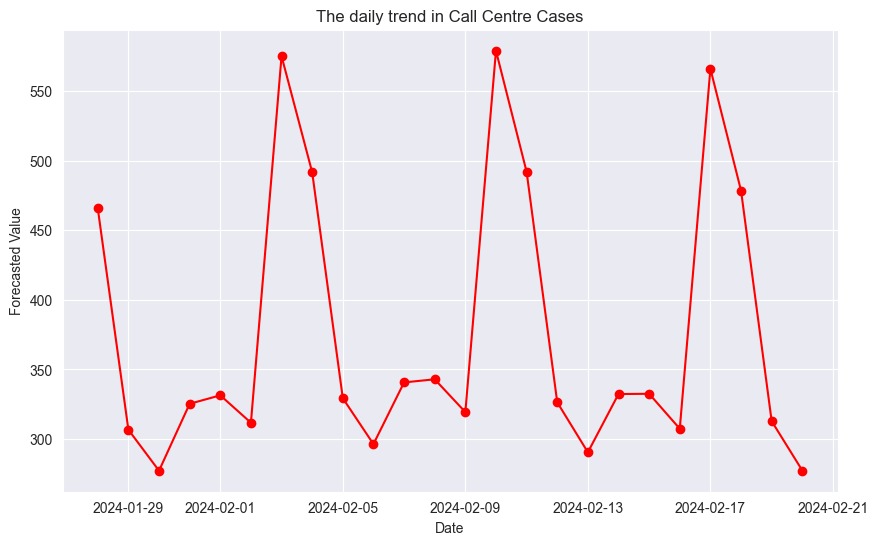

In [18]:
import matplotlib.pyplot as plt

#Select the last 11 rows for next 11 months
last_11_months = forecast.iloc[756:781]

#Plotting 
plt.figure(figsize=(10, 6))
plt.plot(last_11_months['ds'], last_11_months['yhat'], marker='o', color='red')
plt.title('The daily trend in Call Centre Cases')
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.grid(True)
plt.show()

Home Visits Forecast 

In [19]:
home = pd.read_csv(r"C:\Users\Fredrick.Alli\OneDrive - Badger Medical\Home Cases.csv")
home.head()

,Date,HVs
0,01/04/2022,3
1,02/04/2022,22
2,03/04/2022,10
3,04/04/2022,0
4,05/04/2022,2


In [20]:
#To print the first first 5 rows
home.head()

,Date,HVs
0,01/04/2022,3
1,02/04/2022,22
2,03/04/2022,10
3,04/04/2022,0
4,05/04/2022,2


In [21]:
#To print the last five rows
home.tail()

,Date,HVs
662,24/01/2024,1
663,25/01/2024,2
664,26/01/2024,0
665,27/01/2024,7
666,28/01/2024,7


In [24]:
#To see the data types
home.dtypes

Date    datetime64[ns]
HVs              int64
dtype: object

In [25]:
#To change the dates from object to date
home['Date'] = pd.to_datetime(home['Date'], format='%d/%m/%Y')

Creating Time Series model for Home visits using Prophet

In [26]:
from prophet import Prophet

m = Prophet(interval_width = 0.95)

#Now turn the columns to represent "ds" and "y"
home.columns = ["ds", "y"]

#Now training the model 
training_run = m.fit(home)


09:48:34 - cmdstanpy - INFO - Chain [1] start processing
09:48:34 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#This code is used for predicting the future and how long we would be predicting for 
future = m.make_future_dataframe(periods=23, freq='D')

In [29]:
#Let's see what dates the prediction contains "head"
future.head()

,ds
0,2022-04-01
1,2022-04-02
2,2022-04-03
3,2022-04-04
4,2022-04-05


In [30]:
#Let's see the dates prediction contains "Tail"
future.tail()

,ds
685,2024-02-16
686,2024-02-17
687,2024-02-18
688,2024-02-19
689,2024-02-20


In [31]:
#Now use the model to predict for future dates
forecast = m.predict(future)

In [34]:
#To see the predicted values from 01/02/24 to 20/01/24
#What is the predicted values
forecast.tail(21)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
669,2024-01-31,3.181998,-6.189622,7.171292,3.180277,3.186707,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,0.0,0.0,0.0,0.516917
670,2024-02-01,3.174891,-5.329575,8.231574,3.170797,3.183162,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,0.0,0.0,0.0,1.358114
671,2024-02-02,3.167785,-5.330843,8.401737,3.161379,3.179408,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,0.0,0.0,0.0,1.111363
672,2024-02-03,3.160678,2.875060,17.072437,3.151137,3.175978,6.971006,6.971006,6.971006,6.971006,6.971006,6.971006,0.0,0.0,0.0,10.131685
673,2024-02-04,3.153572,0.561757,14.303323,3.141440,3.172272,4.571369,4.571369,4.571369,4.571369,4.571369,4.571369,0.0,0.0,0.0,7.724940
674,2024-02-05,3.146465,-6.031220,7.437501,3.129803,3.169866,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,0.0,0.0,0.0,0.858553
675,2024-02-06,3.139358,-6.056549,7.065660,3.118408,3.167598,-2.716183,-2.716183,-2.716183,-2.716183,-2.716183,-2.716183,0.0,0.0,0.0,0.423176
676,2024-02-07,3.132252,-6.619187,7.549430,3.108503,3.164691,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,0.0,0.0,0.0,0.467171
677,2024-02-08,3.125145,-5.428436,8.336924,3.098602,3.162039,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,0.0,0.0,0.0,1.308368
678,2024-02-09,3.118038,-6.165399,8.429153,3.088702,3.158702,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,0.0,0.0,0.0,1.061616


To compare our results with pre-historical dataset 

In [35]:
#Let's check the last dataset 'tail'
home.tail(11)

,ds,y
656,2024-01-18,1
657,2024-01-19,0
658,2024-01-20,3
659,2024-01-21,7
660,2024-01-22,0
661,2024-01-23,2
662,2024-01-24,1
663,2024-01-25,2
664,2024-01-26,0
665,2024-01-27,7


In [36]:
#let's check the beginning of the last dataset 'head'
home.head(11)

,ds,y
0,2022-04-01,3
1,2022-04-02,22
2,2022-04-03,10
3,2022-04-04,0
4,2022-04-05,2
5,2022-04-06,4
6,2022-04-07,5
7,2022-04-08,3
8,2022-04-09,17
9,2022-04-10,18


In [39]:
#Now let's compare the dataset with pre-historical dataset from 2024-01-18 to 2024-01-27
forecast.iloc[656:666]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
656,2024-01-18,3.274384,-5.143354,8.217770,3.274384,3.274384,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,0.0,0.0,0.0,1.457607
657,2024-01-19,3.267278,-5.398343,7.573288,3.267278,3.267278,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,0.0,0.0,0.0,1.210855
658,2024-01-20,3.260171,3.365361,16.859051,3.260171,3.260171,6.971006,6.971006,6.971006,6.971006,6.971006,6.971006,0.0,0.0,0.0,10.231177
659,2024-01-21,3.253064,1.266862,14.595679,3.253064,3.253064,4.571369,4.571369,4.571369,4.571369,4.571369,4.571369,0.0,0.0,0.0,7.824433
660,2024-01-22,3.245958,-5.751462,7.805383,3.245958,3.245958,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,0.0,0.0,0.0,0.958045
661,2024-01-23,3.238851,-6.231093,7.869154,3.238851,3.238851,-2.716183,-2.716183,-2.716183,-2.716183,-2.716183,-2.716183,0.0,0.0,0.0,0.522668
662,2024-01-24,3.231744,-6.316531,7.546035,3.231744,3.231744,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,0.0,0.0,0.0,0.566664
663,2024-01-25,3.224638,-5.178504,8.210361,3.224638,3.224638,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,0.0,0.0,0.0,1.407861
664,2024-01-26,3.217531,-5.663995,8.043269,3.217531,3.217531,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,0.0,0.0,0.0,1.161109
665,2024-01-27,3.210425,3.509989,16.560291,3.210425,3.210425,6.971006,6.971006,6.971006,6.971006,6.971006,6.971006,0.0,0.0,0.0,10.181431


Now let's see the forecast from 28-01-24 till 20-02-24

In [42]:
#To print the forecast for 27-01-24 till 20-02-24
forecast.iloc[665:690]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
665,2024-01-27,3.210425,3.509989,16.560291,3.210425,3.210425,6.971006,6.971006,6.971006,6.971006,6.971006,6.971006,0.0,0.0,0.0,10.181431
666,2024-01-28,3.203318,0.740699,14.496127,3.203318,3.203318,4.571369,4.571369,4.571369,4.571369,4.571369,4.571369,0.0,0.0,0.0,7.774687
667,2024-01-29,3.196211,-6.049580,7.857972,3.196211,3.196211,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,0.0,0.0,0.0,0.908299
668,2024-01-30,3.189105,-6.366304,7.452419,3.188643,3.190805,-2.716183,-2.716183,-2.716183,-2.716183,-2.716183,-2.716183,0.0,0.0,0.0,0.472922
669,2024-01-31,3.181998,-6.189622,7.171292,3.180277,3.186707,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,-2.665081,0.0,0.0,0.0,0.516917
670,2024-02-01,3.174891,-5.329575,8.231574,3.170797,3.183162,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,-1.816777,0.0,0.0,0.0,1.358114
671,2024-02-02,3.167785,-5.330843,8.401737,3.161379,3.179408,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,-2.056422,0.0,0.0,0.0,1.111363
672,2024-02-03,3.160678,2.875060,17.072437,3.151137,3.175978,6.971006,6.971006,6.971006,6.971006,6.971006,6.971006,0.0,0.0,0.0,10.131685
673,2024-02-04,3.153572,0.561757,14.303323,3.141440,3.172272,4.571369,4.571369,4.571369,4.571369,4.571369,4.571369,0.0,0.0,0.0,7.724940
674,2024-02-05,3.146465,-6.031220,7.437501,3.129803,3.169866,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,-2.287912,0.0,0.0,0.0,0.858553
